In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# Evolution operator
def f(x, y, r):
    if r <= 0 or r > 4: 
        print('r not in defined range')
        return None
    return (r*x*(1-x)-x), (-y)

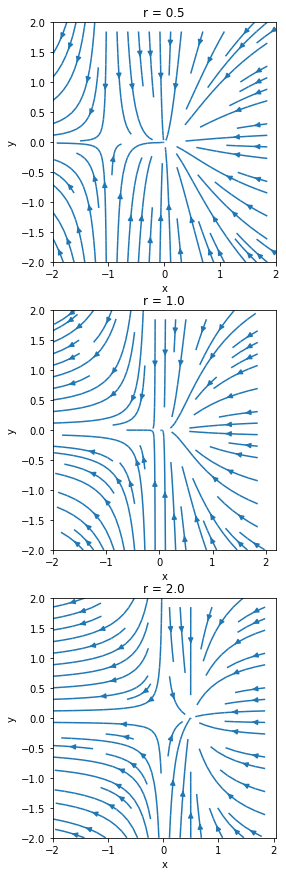

In [3]:
# Phase portraits
# Width, height and points along axes
w = 2
h = 2
n = 100

# x and y dimensions
x_d = np.linspace(-w, w, n)
y_d = np.linspace(-h, h, n)

# Alpha values
r_values = np.array([0.5, 1., 2.])

# Meshgrid
x, y = np.meshgrid(x_d, y_d)

lr = len(r_values)

# Figure
plt.figure(figsize=(4,lr*4 + lr))

for i in range(lr):
    r_val = r_values[i]
    
    splt = plt.subplot(lr, 1, i+1)
    dx, dy = f(x, y, r_val)
    splt.streamplot(x, y, dx, dy, density=0.75)
    splt.set_title('r = ' + str(r_val))
    plt.xlabel('x')
    plt.ylabel('y')

plt.show()

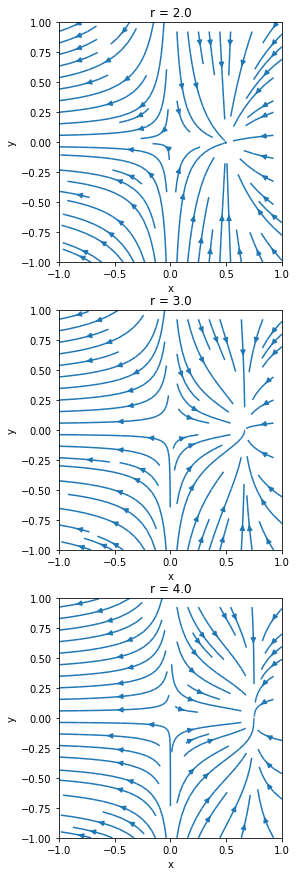

In [4]:
# Phase portraits
# Width, height and points along axes
w = 1
h = 1
n = 100

# x and y dimensions
x_d = np.linspace(-w, w, n)
y_d = np.linspace(-h, h, n)

# Alpha values
r_values = np.array([2., 3., 4.])

# Meshgrid
x, y = np.meshgrid(x_d, y_d)

lr = len(r_values)

# Figure
plt.figure(figsize=(4,lr*4 + lr))

for i in range(lr):
    r_val = r_values[i]
    
    splt = plt.subplot(lr, 1, i+1)
    dx, dy = f(x, y, r_val)
    splt.streamplot(x, y, dx, dy, density=0.75)
    splt.set_title('r = ' + str(r_val))
    plt.xlabel('x')
    plt.ylabel('y')

plt.show()

(0, 1)

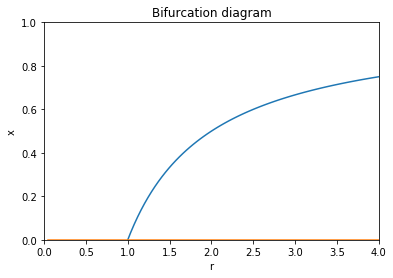

In [5]:
# 4.3
# Bifurcation diagram
r = np.linspace(0., 4.1, 100)
r = r[1:]
x = 1 - (1/r)
#r = np.append(r, r[::-1])
#x = np.append(x, np.zeros(x.shape))

plt.figure()

splt = plt.subplot(111)
splt.set_title('Bifurcation diagram')
splt.plot(r, x)
splt.plot(r, np.zeros(x.shape))
splt.set_xlabel('r')
splt.set_ylabel('x')
splt.set_xlim(0, 4)
splt.set_ylim(0, 1)

In [6]:
# Lorenz equations (vectorized)
def vec_lor(t, vec, sigma, beta, rho):
    x = vec[0]
    y = vec[1]
    z = vec[2]
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y - beta*z
    return np.array([dx, dy, dz])

In [7]:
# Configuration
sigma = 10.
beta = 8./3.
rho = 28.

T_end = 1000.
tspan = (0., T_end)
teval = np.arange(tspan[0], tspan[1], 0.001)

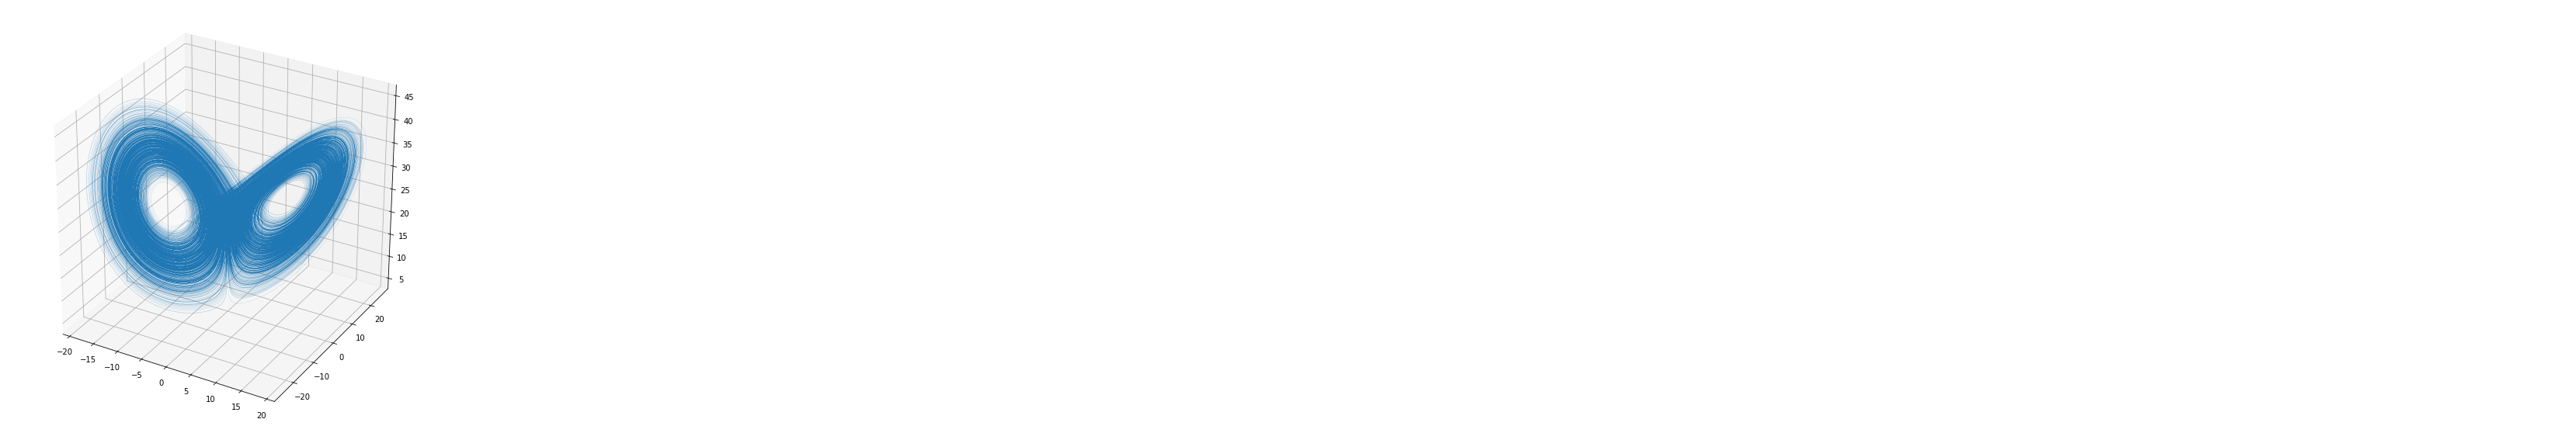

In [8]:
# Trajectory with x0 = (10, 10, 10)
x0 = np.array([10., 10., 10.])

sol = solve_ivp(lambda t, x: vec_lor(t, x, sigma, beta, rho), tspan, x0, t_eval=teval)

fig = plt.figure(figsize=(10.,10.))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.1)

data1 = sol.y

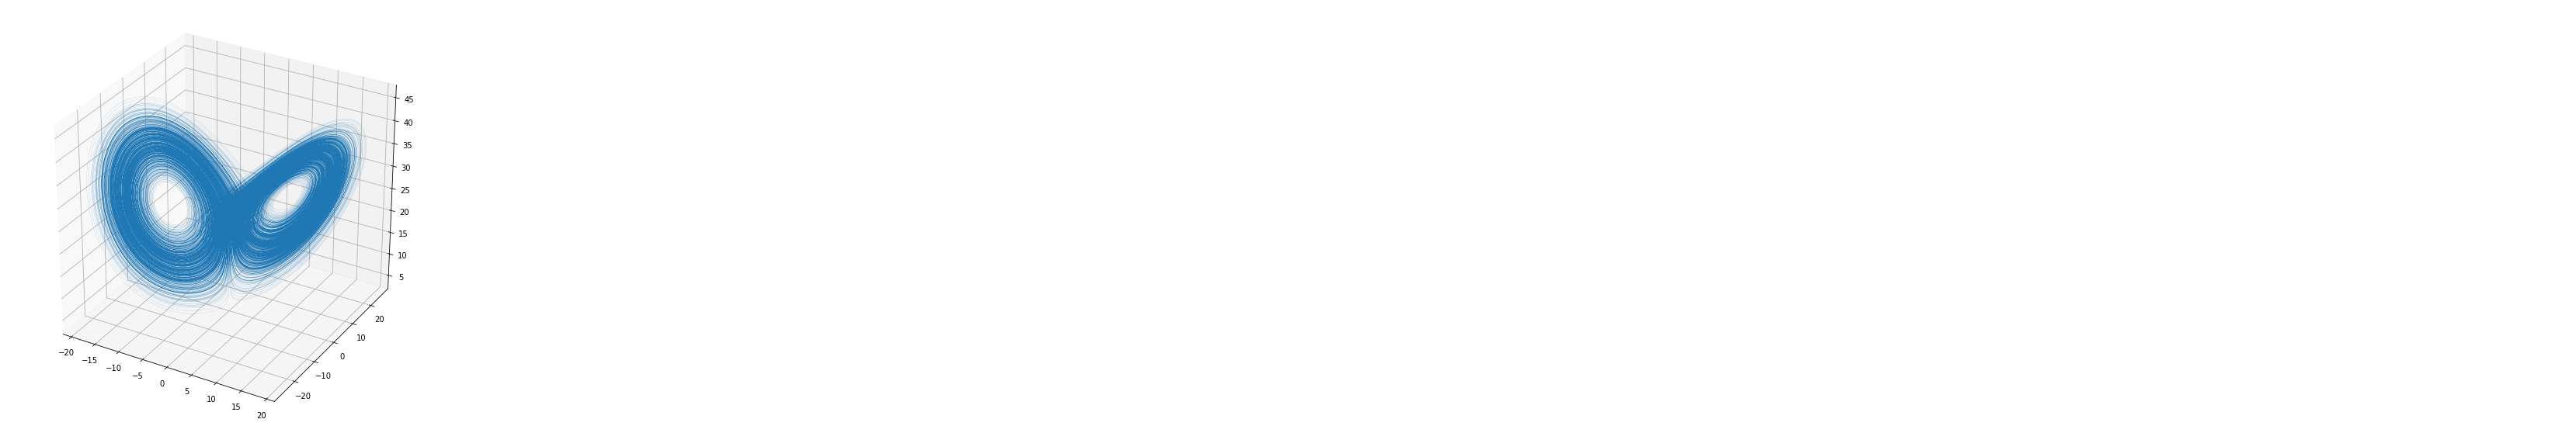

In [9]:
# Trajectory with x0 = (10+10^{-8}, 10, 10)
x0 = np.array([10.+1e-8, 10., 10.])

sol = solve_ivp(lambda t, x: vec_lor(t, x, sigma, beta, rho), tspan, x0, t_eval=teval)

fig = plt.figure(figsize=(10.,10.))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.1)

data2 = sol.y

In [10]:
# Euclidean distance
t = 0
for i in range(data1.shape[1]):
    x1 = data1[0,i]
    y1 = data1[1,i]
    z1 = data1[2,i]
    x2 = data2[0,i]
    y2 = data2[1,i]
    z2 = data2[2,i]
    dist = math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
    if dist > 1:
        # Step size is 0.001
        t = i / 1000
        break

print(t)

23.628


In [11]:
# Configuration
sigma = 10.
beta = 8./3.
rho = 0.5
T_end = 1000.
tspan = (0., T_end)
teval = np.arange(tspan[0], tspan[1], 0.001)

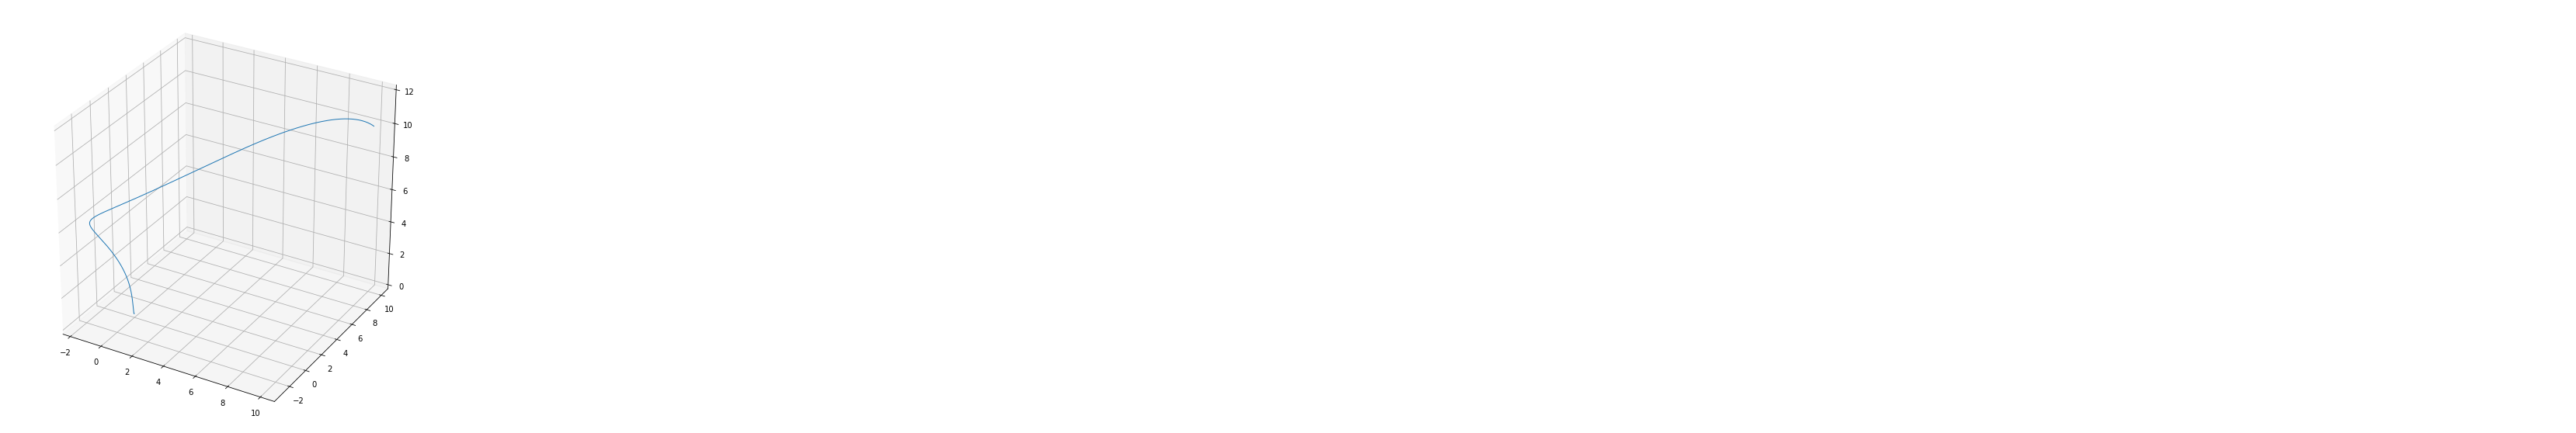

In [12]:
# Trajectory with x0 = (10, 10, 10)
x0 = np.array([10., 10., 10.])

sol = solve_ivp(lambda t, x: vec_lor(t, x, sigma, beta, rho), tspan, x0, t_eval=teval)

fig = plt.figure(figsize=(10.,10.))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=1)


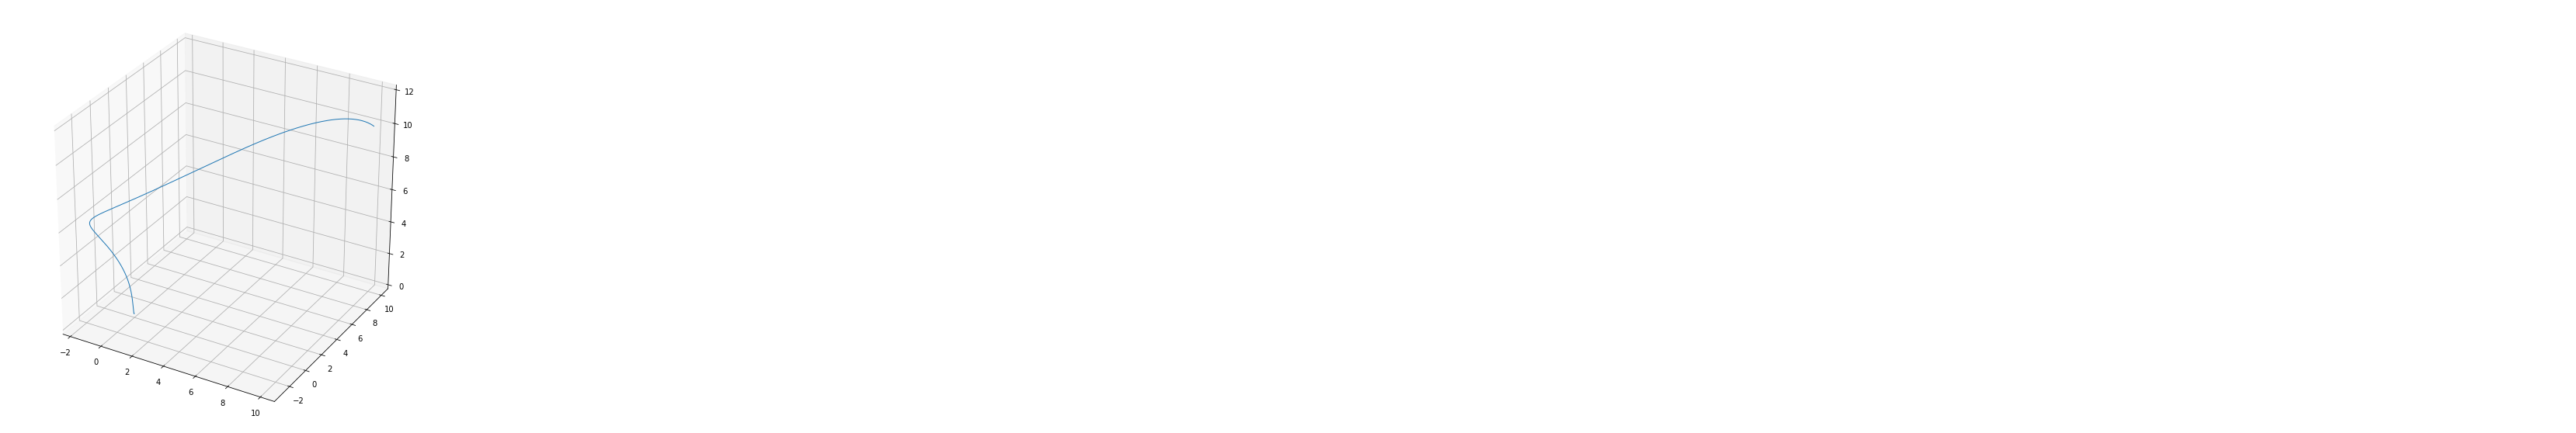

In [13]:
# Trajectory with x0 = (10+10^{-8}, 10, 10)
x0 = np.array([10.+1e-8, 10., 10.])

sol = solve_ivp(lambda t, x: vec_lor(t, x, sigma, beta, rho), tspan, x0, t_eval=teval)

fig = plt.figure(figsize=(10.,10.))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=1)